# Lenght comparison

In [9]:
import encoding.integer as en
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]

## Data for camparison

In [5]:
ordered_list = np.array([1000*i+ 10*i +1  for i in range(100)])
random_list = np.random.randint(1,1000, size=100)

encodings = [('gamma', en.gamma, {}), \
             ('delta', en.delta, {}), \
             ('fibonacci', en.fibonacci, {}), \
             ('levenshtein', en.levenshtein, {}), \
             #('rice (k=0)', en.rice, {}), \
             ('rice (k=16)', en.rice, {'k':16})]    


print('[*] List of ordered integer:', ordered_list, sep='\n')
print('[*] List of random integer:', random_list, sep='\n')

[*] List of ordered integer:
[    1  1011  2021  3031  4041  5051  6061  7071  8081  9091 10101 11111
 12121 13131 14141 15151 16161 17171 18181 19191 20201 21211 22221 23231
 24241 25251 26261 27271 28281 29291 30301 31311 32321 33331 34341 35351
 36361 37371 38381 39391 40401 41411 42421 43431 44441 45451 46461 47471
 48481 49491 50501 51511 52521 53531 54541 55551 56561 57571 58581 59591
 60601 61611 62621 63631 64641 65651 66661 67671 68681 69691 70701 71711
 72721 73731 74741 75751 76761 77771 78781 79791 80801 81811 82821 83831
 84841 85851 86861 87871 88881 89891 90901 91911 92921 93931 94941 95951
 96961 97971 98981 99991]
[*] List of random integer:
[990 875 717 917 164 478 338 585 380 867 343 884   3 453 276 205 371 529
 368 690  29 885 143 539 964 331 930 685 520 683 331  51 333 893 218  64
 445 793 897 659 305 288  31 260 778 751 259 740 967 766 736 267  57 445
 310 696 269 366 910  33 913 262 435 554 295  71 424 548 489 635 211 484
 103 413 593 940  89 233 739 285 448 156 

## Comparison of ordered data

Text(0.5,1,'Ordered compare')

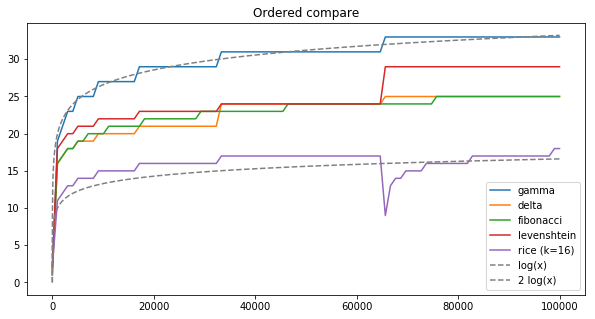

In [10]:
for encoding in encodings:
    encoded_list = []
    
    for integer in ordered_list:
        encoded_list += [encoding[1](integer, **encoding[2])]

    code = ''.join(encoded_list)
    code_lenghts = np.array([len(integer) for integer in encoded_list])

    #print('[*] %s code (lenght: %d):\n'%(encoding[0], len(code)), code, '\n', sep='\n')
    plt.plot(ordered_list, code_lenghts, label=encoding[0])

x = np.array(range(1, 100000))
y_log = np.log2(x)
y_2log = 2*np.log2(x)

plt.plot(x, y_log, '--', c='gray', label='log(x)')
plt.plot(x, y_2log, '--', c='gray', label='2 log(x)')
plt.legend()
plt.title('Ordered compare')

## Comparison of random data

In [11]:
for encoding in encodings:
    encoded_list = []
    for integer in random_list:
        encoded_list += [encoding[1](integer, **encoding[2])]

    print('[*] %s lenght:\t'%encoding[0], np.sum([len(integer) for integer in encoded_list]))

[*] gamma lenght:	 1678
[*] delta lenght:	 1461
[*] fibonacci lenght:	 1322
[*] levenshtein lenght:	 1659
[*] rice (k=16) lenght:	 989
